# **NORMAL/ABNORMAL ARRHYTHMIA PREDICTION NOTEBOOK**

## **Summary**

1. Importing libraries and data
2. Data cleaning and preparation
3. Data transformation function
4. Training: first models
5. Training: hyperparameters tuning
6. Model finalization
7. Test on unseen data

.

.
## **1. Importing libraries and data**

In [354]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import skew
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, KFold
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn import svm

import warnings
warnings.simplefilter("ignore")

In [355]:
#Import data
Data = pd.read_csv("Data.csv")
Data

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature271,Feature272,Feature273,Feature274,Feature275,Feature276,Feature277,Feature278,Feature279,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0,0.5,2.4,25.0,46.6,1


In [356]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Feature1 to Class
dtypes: float64(121), int64(159)
memory usage: 988.9 KB


In [357]:
#The dataset has several columns with only one unique value
for i in Data :
    if len(Data[i].unique())==1 :
        print(i,"Number of unique elements: ",len(Data[i].unique()))

Feature20 Number of unique elements:  1
Feature68 Number of unique elements:  1
Feature70 Number of unique elements:  1
Feature84 Number of unique elements:  1
Feature132 Number of unique elements:  1
Feature133 Number of unique elements:  1
Feature140 Number of unique elements:  1
Feature142 Number of unique elements:  1
Feature144 Number of unique elements:  1
Feature146 Number of unique elements:  1
Feature152 Number of unique elements:  1
Feature157 Number of unique elements:  1
Feature158 Number of unique elements:  1
Feature165 Number of unique elements:  1
Feature205 Number of unique elements:  1
Feature265 Number of unique elements:  1
Feature275 Number of unique elements:  1


In [358]:
#They all represent an amplitude of a particular wave in a particular channel
#Those will be treated later in the dataset
#Creation of a Training set and a Test set. The Test set will be 3% (~14 samples) of the original dataset and it will be used at the end as "unseen data".
X_train, X_test, y_train, y_test = train_test_split(Data.drop(["Class"],axis=1),
                                                        Data["Class"],
                                                        test_size = 0.03, random_state = 0, shuffle=True)
    
X_train.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature270,Feature271,Feature272,Feature273,Feature274,Feature275,Feature276,Feature277,Feature278,Feature279
351,53,1,156,65,73,160,359,248,37,33,...,-0.4,0.0,8.1,0.0,0.0,0,0.1,-0.8,22.6,10.8
21,45,0,169,67,90,122,336,177,78,81,...,-0.4,-0.6,8.3,-1.8,0.0,0,0.8,1.1,11.7,19.6
118,24,1,162,75,88,150,353,156,96,-21,...,-0.2,0.0,5.3,-1.6,0.0,0,0.7,1.2,7.4,15.5
1,56,1,165,64,81,174,401,149,39,25,...,-0.5,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8
10,62,0,170,72,102,135,401,156,83,72,...,-0.4,-0.5,9.0,-2.0,0.0,0,0.8,0.9,12.3,19.3


.

.

## **2. Data cleaning and preparation**

In [359]:
#Check for missing values
print(X_train.isna().sum().sum(),"(",100*X_train.isna().sum().sum()/(X_train.shape[0]*X_train.shape[1]),"%)")

393 ( 0.32159866450630925 %)


In [360]:
#A very small percentage
#What columns?
for i in X_train.columns:
    if X_train[i].isna().sum() > 0 :
        print(i)

Feature11
Feature12
Feature13
Feature14
Feature15


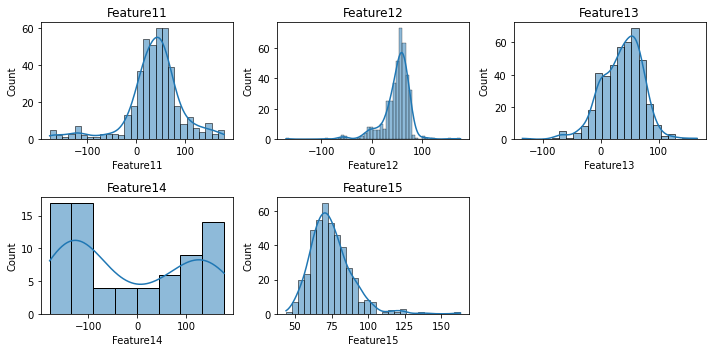

In [361]:
#Ok, let's check those features
plt.figure(figsize=(10,5))
k=1
for i in ["Feature11","Feature12","Feature13","Feature14","Feature15"] :
    plt.subplot(2,3,k)
    sn.histplot(x=X_train[i],kde=True)
    plt.title(i)
    k=k+1

plt.tight_layout()

In [362]:
#For feature 11, 12, and 15, a simple median-imputation may be sufficient
#For feature 14 instead, it may not be a good choice given that the distribution is not Gaussian
#However, that feature (as others) represents an angle, and missing values can be replaced with 0 (average angle between -180 and 180)
#Given that, the mean value is very close to 0, also for those kind of features will be adopted the same kind of imputation method.

#Before moving on, let's find out more about each feature
#Let's check if there are still some feature with only one unique value (this depends on the splitting procedure above)
Number = 0
for i in X_train.columns :
    if len(X_train[i].unique())==1 :
        print(i, ": ", len(X_train[i].unique()))
        Number = Number + 1

if Number == 0 :
    print("All features have at least 2 unique valus")

Feature20 :  1
Feature68 :  1
Feature70 :  1
Feature84 :  1
Feature132 :  1
Feature133 :  1
Feature140 :  1
Feature142 :  1
Feature144 :  1
Feature146 :  1
Feature152 :  1
Feature157 :  1
Feature158 :  1
Feature165 :  1
Feature205 :  1
Feature265 :  1
Feature275 :  1


In [363]:
#There must be a way to combine all those features and get rid of unique values
#Let's take a look at some of them
#In particular, nominal values reported as "existence of ragger _ wave" in the desciption file (there are several similar groups)
X_train.iloc[:,21:27]

,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27
351,0,0,0,0,0,0
21,0,0,0,0,0,0
118,0,0,0,0,0,0
1,0,0,0,0,0,0
10,0,0,0,0,0,0
...,...,...,...,...,...,...
323,0,0,0,0,0,0
192,0,0,0,0,0,0
117,0,0,0,0,0,0
47,0,0,0,0,0,0


In [364]:
#It is possible to try to combina those numbers (0,1) to form a binary number

Bin = []
i = 0
while i<len(X_train) :
    Sum = 0
    k=0
    j=26
    while j>=21 :
        Sum = Sum + X_train.iloc[i,j]*2**k
        k=k+1
        j=j-1
    Bin.append(Sum)
    i=i+1
    
np.unique(Bin)

array([ 0,  1,  2,  3,  4,  8, 16, 17, 32])

In [365]:
#In this example, those six columns can be combined in one with 9 classes
#Moreover, it is always possible to go back to the original features (digit --> binary number --> real numbers)

#The groups of features to consider are:
#   22-27
#   34-39
#   46-51
#   58-63
#   70-75
#   82-87
#   94-99
#   106-111
#   118-123
#   130-135
#   142-147
#   154-159

for kk in [27,39,51,63,75,87,99,111,123,135,147,159] :
    Bin = []
    i = 0
    while i<len(X_train) :
        Sum = 0
        k=0
        j=kk-1
        while j>=kk-6 :
            Sum = Sum + X_train.iloc[i,j]*2**k
            k=k+1
            j=j-1
        Bin.append(Sum)
        i=i+1
    X_train.iloc[:,kk-1] = Bin

Columns_del = []
for kk in [27,39,51,63,75,87,99,111,123,135,147,159] :
    j=kk-1
    while j>=kk-5 :
        Columns_del.append(j)
        j=j-1

X_train.drop(X_train.columns[Columns_del],axis=1,inplace=True)

#Columns with one value
for i in X_train.columns :
    if len(X_train[i].unique())==1 :
        print(i, ": ", len(X_train[i].unique()))
        Number = Number + 1

Feature20 :  1
Feature68 :  1
Feature70 :  1
Feature140 :  1
Feature142 :  1
Feature152 :  1
Feature165 :  1
Feature205 :  1
Feature265 :  1
Feature275 :  1


In [366]:
#Still some columns to treat
#  - Features 20-68-140-152 are related to the S' wave presence (all equal to 0)
#  - Features 165-205-265-275 are related to the S' wave amplitude (all equal to 0)
#  - Features 70-142 are those already treated for which the loop above found only one combination

#For the first features, one way is to combine columns related to R' waves and S' waves: a sum is present for those instances having an R' wave or an S' wave
#The columns to take care of are:
#   19-20
#   32-33
#   44-45
#   56-57
#   68-69
#   80-81
#   92-93
#   104-104
#   116-117
#   128-129
#   140-141
#   152-153

for kk in [19,32,44,56,68,80,92,104,116,128,140,152] :
    exec(f"X_train['Feature{kk}'] = X_train['Feature{kk}'] + X_train['Feature{kk+1}']; X_train.drop(['Feature{kk+1}'],axis=1, inplace=True)")
    
#Columns with one value
for i in X_train.columns :
    if len(X_train[i].unique())==1 :
        print(i, ": ", len(X_train[i].unique()))
        Number = Number + 1

Feature70 :  1
Feature142 :  1
Feature165 :  1
Feature205 :  1
Feature265 :  1
Feature275 :  1


In [367]:
#Now, the same will be done for features 165-205-265-275
for kk in [164,204,264,274] :
    exec(f"X_train['Feature{kk}'] = X_train['Feature{kk}'] + X_train['Feature{kk+1}']; X_train.drop(['Feature{kk+1}'],axis=1, inplace=True)")
    
#Columns with one value
for i in X_train.columns :
    if len(X_train[i].unique())==1 :
        print(i, ": ", len(X_train[i].unique()))
        Number = Number + 1

Feature70 :  1
Feature142 :  1


In [368]:
#Good!
#Now, only those two columns remains.
#As noted before, those are features for which the loop above found only one combination (i.e. one binary number)

#The simple solution is to drop them
X_train.drop(["Feature70","Feature142"],axis=1, inplace=True)
X_train

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature269,Feature270,Feature271,Feature272,Feature273,Feature274,Feature276,Feature277,Feature278,Feature279
351,53,1,156,65,73,160,359,248,37,33,...,26.1,-0.4,0.0,8.1,0.0,0.0,0.1,-0.8,22.6,10.8
21,45,0,169,67,90,122,336,177,78,81,...,21.8,-0.4,-0.6,8.3,-1.8,0.0,0.8,1.1,11.7,19.6
118,24,1,162,75,88,150,353,156,96,-21,...,12.5,-0.2,0.0,5.3,-1.6,0.0,0.7,1.2,7.4,15.5
1,56,1,165,64,81,174,401,149,39,25,...,43.4,-0.5,0.0,8.5,0.0,0.0,0.2,2.1,20.4,38.8
10,62,0,170,72,102,135,401,156,83,72,...,3.7,-0.4,-0.5,9.0,-2.0,0.0,0.8,0.9,12.3,19.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,54,0,164,83,107,182,359,241,127,4,...,0.4,-1.9,0.0,13.9,0.0,0.0,1.1,-2.2,47.2,19.5
192,65,0,180,79,87,137,392,137,91,-22,...,38.9,-0.9,0.0,13.9,0.0,0.0,0.8,0.9,44.4,47.8
117,28,1,159,56,96,153,340,152,90,-16,...,14.7,0.0,0.0,3.1,-1.8,0.0,0.6,1.6,1.8,13.0
47,30,1,158,57,73,137,369,143,77,30,...,26.7,-0.6,0.0,9.5,0.0,0.0,0.4,0.5,22.8,26.0


In [369]:
#Now, the dataset comprices only 201 columns

#Now, it is time to deal with missing values
#Given that all features are numberic, possible missing values in the future may be replaced with the median value

#Replace missing values with median
for i in X_train.columns :
    exec(f"Median_{i} = X_train[i].median() ; X_train[i].fillna(Median_{i},inplace=True)")    
    
print("Number of missing values: {}".format(X_train.isna().sum().sum()))

Number of missing values: 0


In [370]:
#Now, the dataset is complete and made of only numeric values.
#All values will be scaled using the MinMaxScaler

Numeric_scaler = MinMaxScaler()               #It will be used later
Numeric_scaler.fit(X_train)
A = Numeric_scaler.transform(X_train)
X_train = pd.DataFrame(A, columns=X_train.columns)
X_train

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature269,Feature270,Feature271,Feature272,Feature273,Feature274,Feature276,Feature277,Feature278,Feature279
0,0.638554,1.0,0.075556,0.347059,0.138462,0.305344,0.458484,0.512821,0.180488,0.601173,...,0.468407,0.569444,1.000000,0.343220,1.000000,0.0,0.28125,0.298969,0.502256,0.295104
1,0.542169,0.0,0.094815,0.358824,0.269231,0.232824,0.375451,0.252747,0.380488,0.741935,...,0.445953,0.569444,0.853659,0.351695,0.937063,0.0,0.50000,0.494845,0.420301,0.354125
2,0.289157,1.0,0.084444,0.405882,0.253846,0.286260,0.436823,0.175824,0.468293,0.442815,...,0.397389,0.597222,1.000000,0.224576,0.944056,0.0,0.46875,0.505155,0.387970,0.326626
3,0.674699,1.0,0.088889,0.341176,0.200000,0.332061,0.610108,0.150183,0.190244,0.577713,...,0.558747,0.555556,1.000000,0.360169,1.000000,0.0,0.31250,0.597938,0.485714,0.482897
4,0.746988,0.0,0.096296,0.388235,0.361538,0.257634,0.610108,0.175824,0.404878,0.715543,...,0.351436,0.569444,0.878049,0.381356,0.930070,0.0,0.50000,0.474227,0.424812,0.352113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,0.650602,0.0,0.087407,0.452941,0.400000,0.347328,0.458484,0.487179,0.619512,0.516129,...,0.334204,0.361111,1.000000,0.588983,1.000000,0.0,0.59375,0.154639,0.687218,0.353454
434,0.783133,0.0,0.111111,0.429412,0.246154,0.261450,0.577617,0.106227,0.443902,0.439883,...,0.535248,0.500000,1.000000,0.588983,1.000000,0.0,0.50000,0.474227,0.666165,0.543260
435,0.337349,1.0,0.080000,0.294118,0.315385,0.291985,0.389892,0.161172,0.439024,0.457478,...,0.408877,0.625000,1.000000,0.131356,0.937063,0.0,0.43750,0.546392,0.345865,0.309859
436,0.361446,1.0,0.078519,0.300000,0.138462,0.261450,0.494585,0.128205,0.375610,0.592375,...,0.471540,0.541667,1.000000,0.402542,1.000000,0.0,0.37500,0.432990,0.503759,0.397049


In [371]:
#Perfect! Now all values lie in a range between 0 and 1

#Now, let's take a look at the target feature
y_train.value_counts()

1     239
10     47
2      43
6      25
16     21
4      15
3      13
5      13
9       8
15      5
14      4
7       3
8       2
Name: Class, dtype: int64

In [372]:
#It is highly umbalanced between the normal class (1) and the abnormal (the others)
#What can be done is to treat 1 as positive class, and all the others like negative class

#(Notice that the indices of y_train are different with respect to X_train)
y_train.iloc[np.where(y_train!=1)[0]] = 0
y_train = np.array(y_train)
y_train

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [373]:
#Feature selection

#Given the large number of features, PCA can be used for reducing their number
B = PCA(n_components = 0.95)
B2 = B.fit(X_train)                      #It will be used later
X_train_pca = B2.transform(X_train)
X_train_pca.shape

(438, 66)

.

.

## **3. Data transformation function**

In [374]:
#The new dataset has 66 features (from the original 280)

#Now, let's write the function that will contain all the procedures adopted above

def Data_transformation(X,y) :                        #Only the input dataset
    #(1) Combine and drop
    for kk in [27,39,51,63,75,87,99,111,123,135,147,159] :
        Bin = []
        i = 0
        while i<len(X) :
            Sum = 0
            k=0
            j=kk-1
            while j>=kk-6 :
                Sum = Sum + X.iloc[i,j]*2**k
                k=k+1
                j=j-1
            Bin.append(Sum)
            i=i+1
        X.iloc[:,kk-1] = Bin

    Columns_del = []
    for kk in [27,39,51,63,75,87,99,111,123,135,147,159] :
        j=kk-1
        while j>=kk-5 :
            Columns_del.append(j)
            j=j-1

    X.drop(X.columns[Columns_del],axis=1,inplace=True)

    #(2) Combine and drop
    for kk in [19,32,44,56,68,80,92,104,116,128,140,152] :
        exec(f"X['Feature{kk}'] = X['Feature{kk}'] + X['Feature{kk+1}']; X.drop(['Feature{kk+1}'],axis=1, inplace=True)")
    
    #(3) Combine and drop
    for kk in [164,204,264,274] :
        exec(f"X['Feature{kk}'] = X['Feature{kk}'] + X['Feature{kk+1}']; X.drop(['Feature{kk+1}'],axis=1, inplace=True)")
    
    #(4) Drop
    X.drop(["Feature70","Feature142"],axis=1, inplace=True)
    
    #(5) Replace missing values with median value found with the Training set
    for i in X.columns :
        exec(f"X[i].fillna(Median_{i},inplace=True)")  

    #(6) Scaling features
    A = Numeric_scaler.transform(X)
    X = pd.DataFrame(A, columns = X.columns)        
        
    #(7) Correction indices in y
    y.iloc[np.where(y!=1)[0]] = 0
    y = np.array(y)
    
    #(8) PCA reduction
    X = B2.transform(X)


    return X,y

.

.

## **4. Training: first models**

In [375]:
#Create Training set and Test set for the training session: the first will be used to train the model; the second to evaluate possible under/overfitting or other issues
#Use the split 80-20% (~75-25 samples)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_train_pca,y_train,test_size = 0.2, random_state = 0, shuffle=True)

In [376]:
#Several models will be applied on the Training set to predict the variable "Class".
#A stratified k-fold cross-valiation method will be used to evaluate each model mean score (preserving the target class proportion)
#The training and validation set will be splitted as 80-20% of the original dataset, respectively.

CV = StratifiedKFold(n_splits = 5, random_state = 0, shuffle = True)

Iterations = 20
Model_log2_acc,Model_tree2_acc,Model_ran2_acc,Model_xgb2_acc,Model_svm2_acc,Model_knn2_acc = 0,0,0,0,0,0
Model_log2_pre,Model_tree2_pre,Model_ran2_pre,Model_xgb2_pre,Model_svm2_pre,Model_knn2_pre = 0,0,0,0,0,0
Model_log2_rec,Model_tree2_rec,Model_ran2_rec,Model_xgb2_rec,Model_svm2_rec,Model_knn2_rec = 0,0,0,0,0,0
Model_log2_f1,Model_tree2_f1,Model_ran2_f1,Model_xgb2_f1,Model_svm2_f1,Model_knn2_f1 = 0,0,0,0,0,0
Model_log2_auc,Model_tree2_auc,Model_ran2_auc,Model_xgb2_auc,Model_svm2_auc,Model_knn2_auc = 0,0,0,0,0,0
for i in range(Iterations) :
    print(f'\rProcess (%): {100*(i)/(Iterations)}', end='')       #Counter (%)
    #LOGISTIC REGRESSION
    Model_log = LogisticRegression()
    Model_log2_acc = Model_log2_acc + cross_val_score(Model_log, X_train_t, y_train_t, cv = CV, scoring = "accuracy").mean()
    Model_log2_pre = Model_log2_pre + cross_val_score(Model_log, X_train_t, y_train_t, cv = CV, scoring = "precision").mean()
    Model_log2_rec = Model_log2_rec + cross_val_score(Model_log, X_train_t, y_train_t, cv = CV, scoring = "recall").mean()
    Model_log2_f1 = Model_log2_f1 + cross_val_score(Model_log, X_train_t, y_train_t, cv = CV, scoring = "f1").mean()
    Model_log2_auc = Model_log2_auc + cross_val_score(Model_log, X_train_t, y_train_t, cv = CV, scoring = "roc_auc").mean()

    #DECISION TREE
    Model_tree = DecisionTreeClassifier(random_state=0)
    Model_tree2_acc = Model_tree2_acc + cross_val_score(Model_tree, X_train_t, y_train_t, cv = CV, scoring = "accuracy").mean()
    Model_tree2_pre = Model_tree2_pre + cross_val_score(Model_tree, X_train_t, y_train_t, cv = CV, scoring = "precision").mean()
    Model_tree2_rec = Model_tree2_rec + cross_val_score(Model_tree, X_train_t, y_train_t, cv = CV, scoring = "recall").mean()   
    Model_tree2_f1 = Model_tree2_f1 + cross_val_score(Model_tree, X_train_t, y_train_t, cv = CV, scoring = "f1").mean()
    Model_tree2_auc = Model_tree2_auc + cross_val_score(Model_tree, X_train_t, y_train_t, cv = CV, scoring = "roc_auc").mean()
    
    #RANDOM FOREST
    Model_ran = RandomForestClassifier(random_state=0)
    Model_ran2_acc = Model_ran2_acc + cross_val_score(Model_ran, X_train_t, y_train_t, cv = CV, scoring = "accuracy").mean()
    Model_ran2_pre = Model_ran2_pre + cross_val_score(Model_ran, X_train_t, y_train_t, cv = CV, scoring = "precision").mean()
    Model_ran2_rec = Model_ran2_rec + cross_val_score(Model_ran, X_train_t, y_train_t, cv = CV, scoring = "recall").mean()  
    Model_ran2_f1 = Model_ran2_f1 + cross_val_score(Model_ran, X_train_t, y_train_t, cv = CV, scoring = "f1").mean()
    Model_ran2_auc = Model_ran2_auc + cross_val_score(Model_ran, X_train_t, y_train_t, cv = CV, scoring = "roc_auc").mean()
    
    #XGBOOST
    Model_xgb = xgb.XGBClassifier(eval_metric="logloss", use_label_encoder=False, seed=0)
    Model_xgb2_acc = Model_xgb2_acc + cross_val_score(Model_xgb, X_train_t, y_train_t, cv = CV, scoring = "accuracy").mean()
    Model_xgb2_pre = Model_xgb2_pre + cross_val_score(Model_xgb, X_train_t, y_train_t, cv = CV, scoring = "precision").mean()
    Model_xgb2_rec = Model_xgb2_rec + cross_val_score(Model_xgb, X_train_t, y_train_t, cv = CV, scoring = "recall").mean()   
    Model_xgb2_f1 = Model_xgb2_f1 + cross_val_score(Model_xgb, X_train_t, y_train_t, cv = CV, scoring = "f1").mean()
    Model_xgb2_auc = Model_xgb2_auc + cross_val_score(Model_xgb, X_train_t, y_train_t, cv = CV, scoring = "roc_auc").mean()
    
    #SVM
    Model_svm = svm.SVC()
    Model_svm2_acc = Model_svm2_acc + cross_val_score(Model_svm, X_train_t, y_train_t, cv = CV, scoring = "accuracy").mean()
    Model_svm2_pre = Model_svm2_pre + cross_val_score(Model_svm, X_train_t, y_train_t, cv = CV, scoring = "precision").mean()
    Model_svm2_rec = Model_svm2_rec + cross_val_score(Model_svm, X_train_t, y_train_t, cv = CV, scoring = "recall").mean()   
    Model_svm2_f1 = Model_svm2_f1 + cross_val_score(Model_svm, X_train_t, y_train_t, cv = CV, scoring = "f1").mean()
    Model_svm2_auc = Model_svm2_auc + cross_val_score(Model_svm, X_train_t, y_train_t, cv = CV, scoring = "roc_auc").mean()
    
    #KNN
    Model_knn = KNeighborsClassifier()
    Model_knn2_acc = Model_knn2_acc + cross_val_score(Model_knn, X_train_t, y_train_t, cv = CV, scoring = "accuracy").mean()
    Model_knn2_pre = Model_knn2_pre + cross_val_score(Model_knn, X_train_t, y_train_t, cv = CV, scoring = "precision").mean()
    Model_knn2_rec = Model_knn2_rec + cross_val_score(Model_knn, X_train_t, y_train_t, cv = CV, scoring = "recall").mean()   
    Model_knn2_f1 = Model_knn2_f1 + cross_val_score(Model_knn, X_train_t, y_train_t, cv = CV, scoring = "f1").mean()
    Model_knn2_auc = Model_knn2_auc + cross_val_score(Model_knn, X_train_t, y_train_t, cv = CV, scoring = "roc_auc").mean()
    
    
#Final results
Data_res = {"Mean_accuracy" : [Model_log2_acc/Iterations,Model_tree2_acc/Iterations,Model_ran2_acc/Iterations,Model_xgb2_acc/Iterations,Model_svm2_acc/Iterations,Model_knn2_acc/Iterations],
        "Mean_Precision" : [Model_log2_pre/Iterations,Model_tree2_pre/Iterations,Model_ran2_pre/Iterations,Model_xgb2_pre/Iterations,Model_svm2_pre/Iterations,Model_knn2_pre/Iterations],
        "Mean_Recall" : [Model_log2_rec/Iterations,Model_tree2_rec/Iterations,Model_ran2_rec/Iterations,Model_xgb2_rec/Iterations,Model_svm2_rec/Iterations,Model_knn2_rec/Iterations],
        "Mean_F1_score" : [Model_log2_f1/Iterations,Model_tree2_f1/Iterations,Model_ran2_f1/Iterations,Model_xgb2_f1/Iterations,Model_svm2_f1/Iterations,Model_knn2_f1/Iterations],
        "Mean_AUC_score" : [Model_log2_auc/Iterations,Model_tree2_auc/Iterations,Model_ran2_auc/Iterations,Model_xgb2_auc/Iterations,Model_svm2_auc/Iterations,Model_knn2_auc/Iterations]
       }

Results = pd.DataFrame(data = Data_res,index = ["Logistic", "DecisionTree","RandomForest","XGBoost","SVM","KNN"]).sort_values(by="Mean_accuracy",ascending=False)
Results

Process (%): 95.0

,Mean_accuracy,Mean_Precision,Mean_Recall,Mean_F1_score,Mean_AUC_score
SVM,0.797143,0.768421,0.900000,0.827635,0.851809
Logistic,0.782857,0.766810,0.863158,0.811580,0.844901
XGBoost,0.765714,0.769246,0.821053,0.789166,0.834211
RandomForest,0.754286,0.760583,0.800000,0.778370,0.822204
DecisionTree,0.662857,0.670508,0.752632,0.707567,0.654441
KNN,0.654286,0.625623,0.905263,0.739665,0.729688


.

.

## **5. Training: hyperparameters tuning**

In [377]:
#The best models are SVM and Logistic

#Hyperparameters tuning
#The scoring metric will be the accuracy

#Hyperameters grid
Params_svm = {"C":[0.001,0.01,0.1,0.5,1,5,10], "kernel":["linear", "poly","rbf","sigmoid"]}
Params_log = {"penalty":["l1","l2","elasticnet","none"], "C":[0.001,0.01,0.1,0.5,1,5,10], "solver":["newton-cg","lbfgs","liblinear","saga"], "max_iter":[1e04]}

#Grid search with a 5-fold cross-validation method\
CV = KFold(n_splits=5, random_state = 0, shuffle=True)
Grid_svm = GridSearchCV(Model_svm, cv = CV, param_grid = Params_svm, scoring = "accuracy", n_jobs = -1, return_train_score=True)
Grid_svm2 = Grid_svm.fit(X_train_t, y_train_t)
print("SVM model: done!")
Grid_log = GridSearchCV(Model_log, cv = CV, param_grid = Params_log, scoring = "accuracy", n_jobs = -1, return_train_score=True)
Grid_log2 = Grid_log.fit(X_train_t, y_train_t)
print("Logistic model: done!")

print("\n\nThe best SVM model is: ",Grid_svm2.best_params_)
print("The best Logistic model is: ",Grid_log2.best_params_)
print("\nThe best SVM Accuracy is: ",Grid_svm2.best_score_)
print("The best Logistic Accuracy is: ",Grid_log2.best_score_)

SVM model: done!


/home/samuele/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/home/samuele/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/home/samuele/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/home/samuele/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/home/samuele/miniconda3/lib/python3.7/s

Logistic model: done!


The best SVM model is:  {'C': 1, 'kernel': 'linear'}
The best Logistic model is:  {'C': 10, 'max_iter': 10000.0, 'penalty': 'l2', 'solver': 'newton-cg'}

The best SVM Accuracy is:  0.8
The best Logistic Accuracy is:  0.7657142857142857


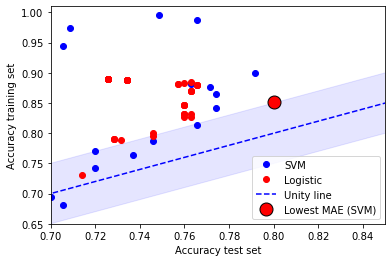

In [378]:
#The best one is the SVM model

#Training vs. Validation accuracy
A = pd.concat([pd.Series(Grid_svm2.cv_results_["mean_test_score"]),pd.Series(Grid_svm2.cv_results_["mean_train_score"])],axis=1)
B = pd.concat([pd.Series(Grid_log2.cv_results_["mean_test_score"]),pd.Series(Grid_log2.cv_results_["mean_train_score"])],axis=1)
A.columns=["Test","Train"]
B.columns=["Test","Train"]
A.sort_values("Test")
B.sort_values("Test")
plt.plot(A.Test,A.Train,'ob')
plt.plot(B.Test,B.Train,'or')
plt.plot([0.4,0.90],[0.4,0.90],'--b')
plt.fill_between([0.4,0.90],[0.35,0.85],[0.45,0.95],color='blue',alpha=0.1, label="_nolegend_")
plt.plot(A.Test[np.argmax(A.Test)],A.Train[np.argmax(A.Test)],'ro',markersize=13,mec="black")
plt.ylim([0.65,1.01])
plt.xlim([0.7,0.85])
plt.xlabel("Accuracy test set")
plt.ylabel("Accuracy training set")
plt.legend(["SVM","Logistic","Unity line","Largest Accuracy (SVM)"], loc="lower right")

In [379]:
#The SVM model is slightly overfitting (on the border of the shaded region)
#Let's try to explore the SVM hyperparameters and understand if they can be optimized further

#Hyperameters grid
Params_svm = {"C":np.arange(0.0,10,0.1), "kernel":["linear","rbf"]}

#Grid search with a 5-fold cross-validation method\
CV = KFold(n_splits=5, random_state = 0, shuffle=True)
Grid_svm22 = GridSearchCV(Model_svm, cv = CV, param_grid = Params_svm, scoring = "accuracy", n_jobs = -1, return_train_score=True)
Grid_svm222 = Grid_svm22.fit(X_train_t, y_train_t)

print("\n\nThe best SVM model is: ",Grid_svm222.best_params_)
print("\nThe best SVM Accuracy is: ",Grid_svm222.best_score_)



The best SVM model is:  {'C': 1.9000000000000001, 'kernel': 'linear'}

The best SVM Accuracy is:  0.8028571428571428


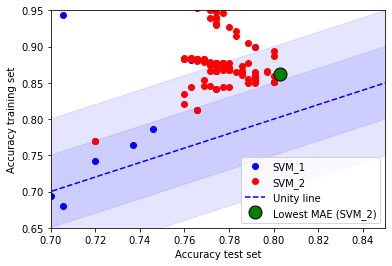

In [380]:
#The accuracy is larger than before

#Let's take a look at the training/validation scores
#Training vs. Validation accuracy
A = pd.concat([pd.Series(Grid_svm2.cv_results_["mean_test_score"]),pd.Series(Grid_svm2.cv_results_["mean_train_score"])],axis=1)
B = pd.concat([pd.Series(Grid_svm222.cv_results_["mean_test_score"]),pd.Series(Grid_svm222.cv_results_["mean_train_score"])],axis=1)
A.columns=["Test","Train"]
B.columns=["Test","Train"]
A.sort_values("Test")
B.sort_values("Test")
plt.plot(A.Test,A.Train,'ob')
plt.plot(B.Test,B.Train,'or')
plt.plot([0.4,0.90],[0.4,0.90],'--b')
plt.fill_between([0.4,0.90],[0.35,0.85],[0.45,0.95],color='blue',alpha=0.1, label="_nolegend_")
plt.fill_between([0.4,0.90],[0.30,0.80],[0.50,1.0],color='blue',alpha=0.1, label="_nolegend_")
plt.plot(B.Test[np.argmax(B.Test)],B.Train[np.argmax(B.Test)],'go',markersize=13,mec="black")
plt.ylim([0.65,0.95])
plt.xlim([0.7,0.85])
plt.xlabel("Accuracy test set")
plt.ylabel("Accuracy training set")
plt.legend(["SVM_1","SVM_2","Unity line","Largest Accuracy (SVM_2)"], loc="lower right")

In [389]:
#Slighlty better accuracy but a bit more overfittig

#Let's use the previous model
#Accuracy on training and test set
Model1 = svm.SVC(C = 1.0, kernel = "linear")
Model11 = Model1.fit(X_train_t,y_train_t)

Final_accuracy_tr = (Model11.predict(X_train_t) == y_train_t).sum()/len(y_train_t)
Final_accuracy_te = (Model11.predict(X_test_t) == y_test_t).sum()/len(y_test_t)
print("The Accuracy on the Training set is:  {:.2f}% (AUC: {:.2f})".format(100*Final_accuracy_tr,roc_auc_score(y_train_t,Model11.predict(X_train_t))))
print("The Accuracy on the Test set is:  {:.2f}% (AUC: {:.2f})".format(100*Final_accuracy_te,roc_auc_score(y_train_t,Model11.predict(X_train_t))))

The Accuracy on the Training set is:  84.57% (AUC: 0.84)
The Accuracy on the Test set is:  70.45% (AUC: 0.84)


In [390]:
#The small accuracy on the Test set may be due to the small number of samples

#Confusion matrix
Conf_matrix = confusion_matrix(y_test_t, Model1.predict(X_test_t))
print("Precision: {:.2f}".format(precision_score(y_test_t, Model1.predict(X_test_t))))
print("Recall: {:.2f}".format(recall_score(y_test_t, Model1.predict(X_test_t))))
print("F1-score: {:.2f}\n".format(f1_score(y_test_t, Model1.predict(X_test_t))))
pd.DataFrame(data=Conf_matrix, columns=["Predicted_Abnormal","Predicted_Normal"], index=["Actual_Abnormal","Actual_Normal"])

Precision: 0.71
Recall: 0.80
F1-score: 0.75



,Predicted_Abnormal,Predicted_Normal
Actual_Abnormal,23,16
Actual_Normal,10,39


.

.

## **6. Model finalization**

In [391]:
#Finalization of the model
#Final training on the whole dataset
Model1 = svm.SVC(C=1.0, kernel="linear")
Best_model = Model1.fit(X_train_pca, y_train)

#Final accuracy on the whole Training set
Final_accuracy = (Best_model.predict(X_train_pca) == y_train).sum()/len(y_train)
print("The final Accuracy on the whole Training set is:  {:.2f}% (AUC: {:.2f})".format(100*Final_accuracy,roc_auc_score(y_train,Model11.predict(X_train_pca))))

#Confusion matrix
Conf_matrix = confusion_matrix(y_train, Best_model.predict(X_train_pca))
print("\nPrecision: {:.2f}".format(precision_score(y_train, Best_model.predict(X_train_pca))))
print("Recall: {:.2f}".format(recall_score(y_train, Best_model.predict(X_train_pca))))
print("F1-score: {:.2f}\n".format(f1_score(y_train, Best_model.predict(X_train_pca))))
pd.DataFrame(data=Conf_matrix, columns=["Predicted_Abnormal","Predicted_Normal"], index=["Actual_Abnormal","Actual_Normal"])

The final Accuracy on the whole Training set is:  82.19% (AUC: 0.81)

Precision: 0.78
Recall: 0.93
F1-score: 0.85



,Predicted_Abnormal,Predicted_Normal
Actual_Abnormal,138,61
Actual_Normal,17,222


.

.

## **7. Test on unseen data**

In [384]:
#Preparation of the Test set using the the function defined previously
X_test, y_test = Data_transformation(X_test,y_test)

In [392]:
#Accuracy on the Test set (using the function "Final_Model_predict(X)"
Final_accuracy_test = (Best_model.predict(X_test) == y_test).sum()/len(y_test)
print("The accuracy on the unseen Test set is:  {:.2f}%".format(100*Final_accuracy_test))

The accuracy on the unseen Test set is:  85.71%


In [393]:
#Confusion matrix\n",
Conf_matrix = confusion_matrix(y_test, Best_model.predict(X_test))
pd.DataFrame(data=Conf_matrix, columns=["Predicted_Abnormal","Predicted_Normal"], index=["Actual_Abnormal","Actual_Normal"])

,Predicted_Abnormal,Predicted_Normal
Actual_Abnormal,6,2
Actual_Normal,0,6
